## **Exercise 2.02: Guided Exercise**
### Bivariate Analysis

### Importing Libraries

In [ ]:
# Import basic libraries
import numpy as np 
import pandas as pd 


In [ ]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Loading the Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datawrangling/main/Chapter%202/Directory-of-Representatives-Jan-17.csv')
df.head(5)
df.info()

In [ ]:
print(df.duplicated().sum())


### Data Preprocessing

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum()
print(df.District)

In [ ]:
print('Name' + str(sorted(df['Name'].unique())))
print('State' + str(sorted(df['State'].unique())))
print('District' + str(sorted(df['District'].unique())))
print('Party' + str(sorted(df['Party'].unique())))
print('Room' + str(sorted(df['Room'].unique())))
print('Phone' + str(sorted(df['Phone'].unique())))

In [ ]:
df = df[df.District != -1]
print('District ' + str(sorted(df['District'].unique())))

In [ ]:
df = df.rename(columns={'Committee Assignment': 'Assignment', 
                        'House Positions': 'Positions'})
df.head()

In [ ]:
df.describe(include='all')
df.info()

### **Univariate Analysis of Continuous Variables**


In [ ]:
# store columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns


In [ ]:
  # display columns
print('\nint64 columns:\n',integer_columns)
print('\nfloat64 columns:\n',float_columns)
print('\nobject columns:\n',object_columns)

# Remove the .columns and it saves it as a dataframe
num_features = df.select_dtypes(exclude=['object'])
cat_features = df.select_dtypes(include=['object'])
type(num_features)
type(cat_features)
cat_features

In [ ]:
num_list = ['District']
num_list


In [ ]:
cat_list = ['Name', 'State', 'Party', 'Room', 'Phone', 'House Positions',
       'Committee Assignment']

In [ ]:
# Remove the .columns and it saves it as a dataframe
num_features = df.select_dtypes(exclude=['object'])
cat_features = df.select_dtypes(include=['object'])
type(num_features)
type(cat_features)
num_features.describe(include='all')

## Plotting histograms 




In [ ]:
plt.figure(figsize=(12,5))
df['District'].plot(kind='density')
plt.axvline(x=df.District.mean(),label='mean',color='Red')
plt.axvline(x=df.District.median(),label='median',color='Green')
plt.boxplot


In [ ]:
sns.histplot(df.District,kde=True)


In [ ]:
sns.countplot(x="Name", data=df)
df['Name'].value_counts()


In [ ]:
sns.countplot(x="State", data=df)
df['State'].value_counts()


In [ ]:
sns.countplot(x="Party", data=df)
df['Party'].value_counts()


In [ ]:
sns.countplot(x="Room", data=df)
df['Room'].value_counts()


In [ ]:
sns.countplot(x="Phone", data=df)
df['Phone'].value_counts()


In [ ]:
sns.countplot(x="House Positions", data=df)
df['House Positions'].value_counts()

In [ ]:
sns.countplot(x="Committee Assignment", data=df)
df['Committee Assignment'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sex = sns.countplot(x='District', hue='State', data=df)
plt.show()

In [ ]:
pd.crosstab(df.State,df.Room,margins=True)

In [ ]:
pd.crosstab(df.State,df.Room,normalize='index')


In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='Room', hue='State', data=df)
plt.show()

In [ ]:
pd.crosstab(df.Room,df.State,margins=True)


In [ ]:
pd.crosstab(df.Room,df.State,normalize='index')

## **Bivariate Analysis of Categorical Variables vs Continuous Variables:**
GroupBy: First, we will perform the GroupBy operation on the continuous variables. Groupby allows us to split our data into separate groups to perform computations for better analysis.


In [ ]:

# Get a global view of all continuous variables with respect to a single categorical variable
# This can take a long time to run - you may want to limit the charts
# this is for the eyeball test.  look for obvious patterns

# sns.pairplot(data=df[num_list],hue='is_recid')
 
# by=<catagorical variable... then - everything after that is a numeric (continuous variable)
df.groupby(by='State').agg('mean')


In [ ]:
df.groupby(by='State').agg('mean')[['District']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


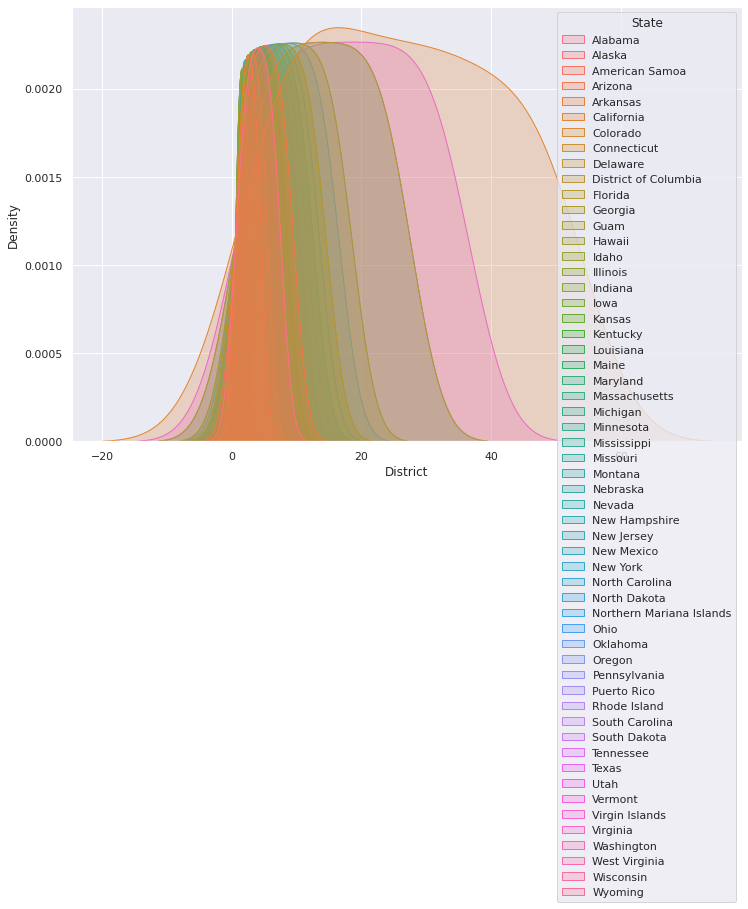

In [ ]:

# x = <NUMERIC VARIABLE>, hue = <CATEGORICAL VARIABLE>
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x='District',hue='State',fill=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


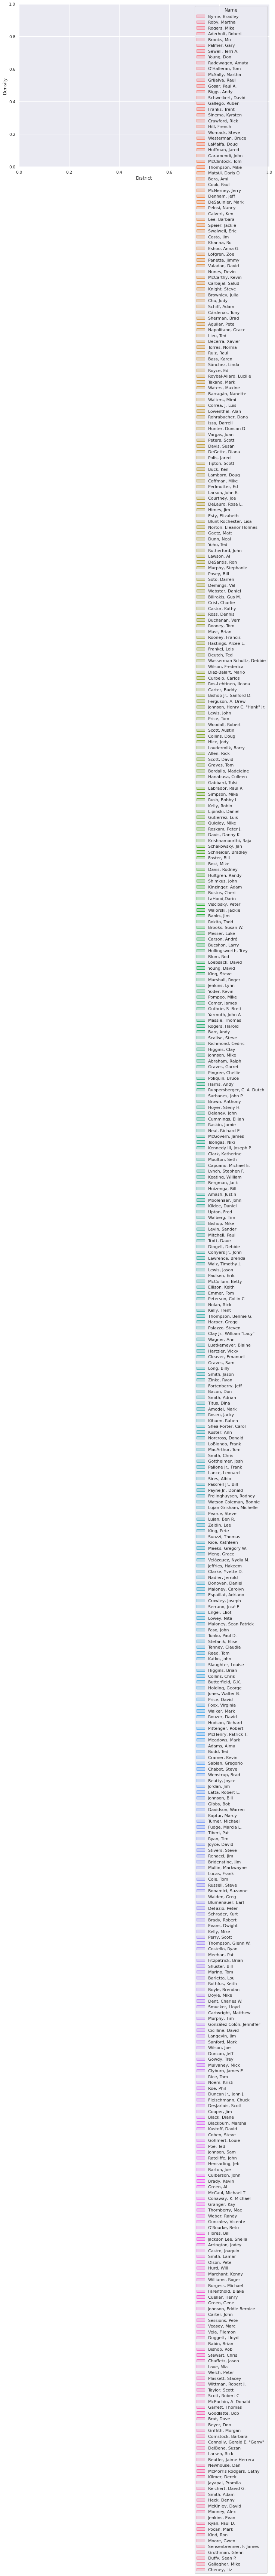

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x='District',hue='Name',fill=True)

## Correlation

In [ ]:
num_features.corr()

,District
District,1.0


In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

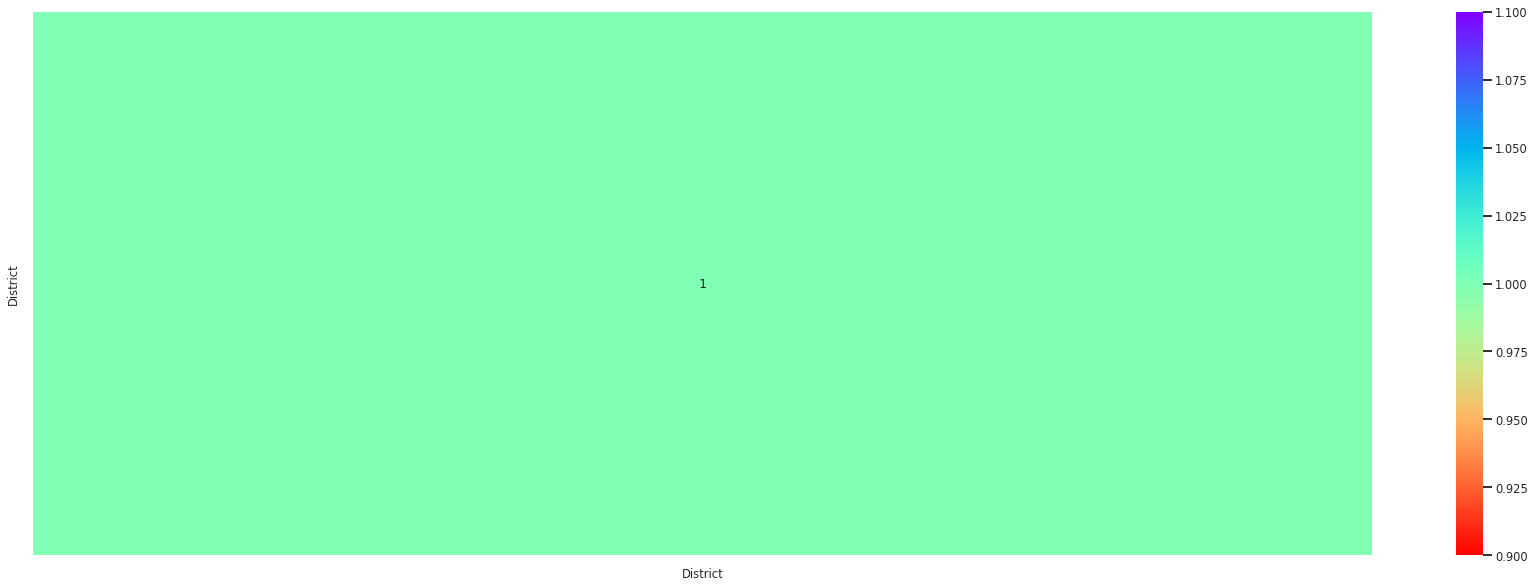

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
df.drop("State", axis=1).apply(lambda x: x.corr(df.State,method='spearman'))

Name                   -0.039382
District               -0.114813
Party                   0.151540
Room                    0.028012
Phone                   0.054027
House Positions         0.091186
Committee Assignment   -0.004251
dtype: float64